<br>
<br>

# Nonlinear dimensionality reduction via Kernel PCA

<br>
<br>

**La mayoría de los algoritmos de aprendizaje automático se han desarrollado y validado estadísticamente para datos linealmente separables. Algunos ejemplos populares son los clasificadores lineales como las máquinas de vectores de apoyo (SVM) o el análisis de componentes principales (PCA) para la reducción de la dimensionalidad. Sin embargo, la mayoría de los datos del mundo real requieren métodos no lineales para realizar con éxito las tareas que implican el análisis y el descubrimiento de patrones.**

**El objetivo de este notebook es introducir brevemente la idea de los métodos de kernel e implementar un kernel de función de radio gaussiano (RBF) que se utiliza para realizar la reducción de la dimensionalidad no lineal a través del análisis de componentes principales del kernel BF (kPCA).

<br>
<br>

## Principal Component Analysis

El objetivo principal del análisis de componentes principales (PCA) es el análisis de datos para identificar patrones que representen "bien" los datos. Los componentes principales pueden entenderse como nuevos ejes del conjunto de datos que maximizan la varianza a lo largo de esos ejes (los eigenvectores de la matriz de covarianza). En otras palabras, el PCA pretende encontrar los ejes con las máximas varianzas a lo largo de los cuales los datos están más repartidos.

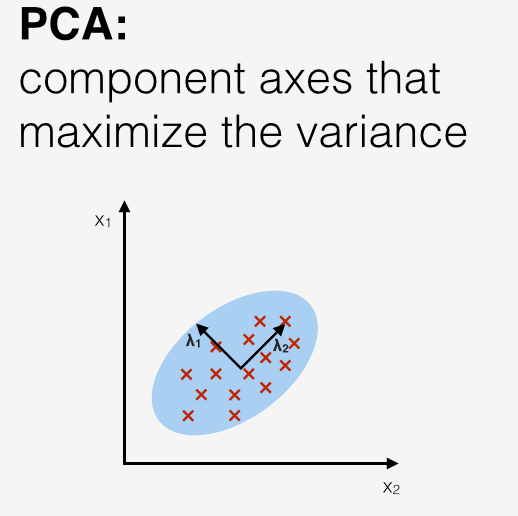



<br>
<br>

## PCA and linear dimensionality reduction

[[back to top](#Sections)]

Una aplicación común del PCA es reducir las dimensiones del conjunto de datos con una pérdida mínima de información.
En este caso, el conjunto de datos (*d* dimensiones) se proyecta en un nuevo subespacio (*k* dimensiones donde *k* < *d*).
Este método de proyección es útil para reducir los costes computacionales y el error de estimación de los parámetros ("maldición de la dimensionalidad").




<br>
<br>

## Nonlinear dimensionality reduction

[[back to top](#Sections)]

El enfoque "clásico" del PCA descrito anteriormente es una técnica de proyección lineal que funciona bien si los datos son linealmente separables. Sin embargo, en el caso de datos linealmente inseparables, se requiere una técnica no lineal si la tarea es reducir la dimensionalidad de un conjunto de datos.


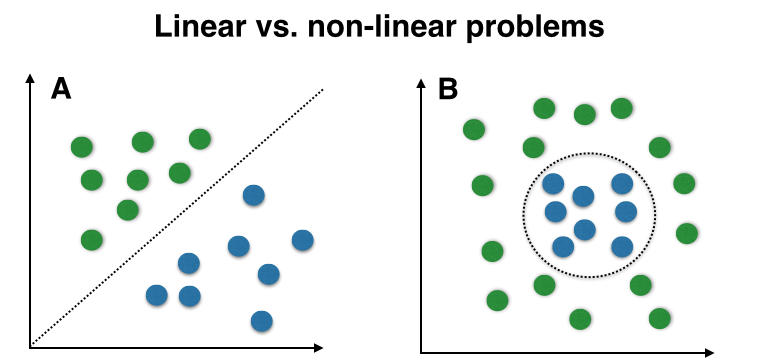




<br>
<br>

## Kernel functions and the kernel trick

[[back to top](#Sections)]

La idea básica para tratar los datos linealmente inseparables es proyectarlos en un espacio de mayor dimensión donde se convierten en linealmente separables. Llamemos a esta función de mapeo no lineal $\phi$ para que el mapeo de una muestra $\mathbf{x}$ pueda escribirse como $\mathbf{x} \rightarrow \phi (\mathbf{x})$, que se denomina "función kernel".

Ahora, el término "kernel" describe una función que calcula el producto punto de las imágenes de las muestras $\mathbf{x}$ bajo $\phi$.


\begin{equation}\kappa(\mathbf{x_i, x_j}) = \phi (\mathbf{x_i}) \phi (\mathbf{x_j})^T \end{equation}

En este excelente artículo de revisión de Quan Wang se ofrecen más detalles sobre la derivación de esta ecuación:  [Kernel Principal Component Analysis and its Applications in Face Recognition and Active Shape Models](http://arxiv.org/abs/1207.3538).



<br>

En otras palabras, la función $\phi$ mapea las características originales d-dimensionales en un espacio de características más grande, k-dimensional, creando combinaciones no lineales de las características originales. Por ejemplo, si $\mathbf{x}$ consta de 2 características:

\begin{equation} \mathbf{x} = \big[x_1 \quad x_2\big]^T \quad \quad \mathbf{x} \in I\!R^d\\
\Downarrow \phi \\
 \mathbf{x}' = \big[x_1 \quad x_2 \quad x_1 x_2 \quad x_{1}^2 \quad x_1 x_{2}^3 \quad \dots \big]^T \quad \quad \mathbf{x} \in I\!R^k (k >> d) \end{equation}



A menudo, la definición matemática del kernel RBF se escribe e implementa
así

\begin{equation} \kappa(\mathbf{x_i, x_j}) = exp\bigg(- \gamma \; \lVert\mathbf{x_i - x_j }\rVert^{2}_{2} \bigg)\end{equation}

donde $\textstyle\gamma = \tfrac{1}{2\sigma^2}$ es un parámetro a optimizar

<br>
<br>

## Gaussian radial basis function (RBF) Kernel PCA

[[back to top](#Sections)]

En el enfoque del PCA lineal, nos interesan los componentes principales que maximizan la varianza del conjunto de datos. Para ello, se extraen los eigenvectores (componentes principales) que corresponden a los mayores valores propios basados en la matriz de covarianza:

\begin{equation}\text{Cov} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{x_i} \mathbf{x_i}^T \end{equation}

Bernhard Scholkopf ([Kernel Principal Component Analysis](http://dl.acm.org/citation.cfm?id=299113) [[2](#References)]) generalizó este enfoque para los datos que fueron mapeados en el espacio de mayor dimensión a través de una función de kernel:

\begin{equation}\text{Cov} = \frac{1}{N} \sum_{i=1}^{N} \phi(\mathbf{x_i}) \phi(\mathbf{x_i})^T \end{equation}

Sin embargo, en la práctica, la matriz de covarianza en el espacio dimensional superior no se calcula explícitamente (truco del kernel). Por lo tanto, la implementación del PCA de kernel RBF no produce los ejes de los componentes principales (a diferencia del PCA estándar), pero los eigenvectores obtenidos pueden entenderse como proyecciones de los datos sobre los componentes principales.


<br>
<br>

## RBF kernel PCA paso a paso

[[back to top](#Sections)]

Para implementar el kernel PCA de RBF sólo hay que tener en cuenta los dos pasos siguientes.

##### 1. Cálculo de la matriz kernel (de similitud).

En este primer paso, necesitamos calcular

\begin{equation} \kappa(\mathbf{x_i, x_j}) = exp\bigg(- \gamma \; \lVert\mathbf{x_i - x_j }\rVert^{2}_{2} \bigg)\end{equation}

para cada par de puntos. Por ejemplo, si tenemos un conjunto de datos de 100 muestras, este paso daría como resultado una matriz kernel simétrica de 100x100.

##### 2. Eigendecomposición de la matriz del kernel.

Como no está garantizado que la matriz kernel esté centrada, podemos aplicar la siguiente ecuación para hacerlo:

\begin{equation} K' = K - \mathbf{1_N} K - K \mathbf{1_N} + \mathbf{1_N} K \mathbf{1_N} \end{equation}

donde $\mathbf{1_N}$ es (como la matriz Kernel) una matriz $N\times N$ matrix donde todos los valores son $\frac{1}{N}$. [[3](#References)]

Ahora, tenemos que obtener los eigenvectores de la matriz kernel centrada que corresponden a los mayores eigenvalores. Esos eigenvectores son los puntos de datos ya proyectados en los respectivos componentes principales.


A continuación, implementamos esos pasos en Python para ver cómo funcionan esos cálculos.

<br>
<br>

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pc

<br>
<br>

# Ejemplos RBF Kernel PCA

[[back to top](#Sections)]

En esta sección, aplicaremos el PCA de kernel RBF a diferentes datos de muestras no lineales de datos no lineales con el fin de realizar una reducción de la dimensionalidad.

<br>

## Formas de Media Luna

[[back to top](#Sections)]

Empezamos con dos formas de medialuna generadas por
[`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) función de [scikit-learn](http://scikit-learn.org/stable/index.html).

In [ ]:
%matplotlib inline

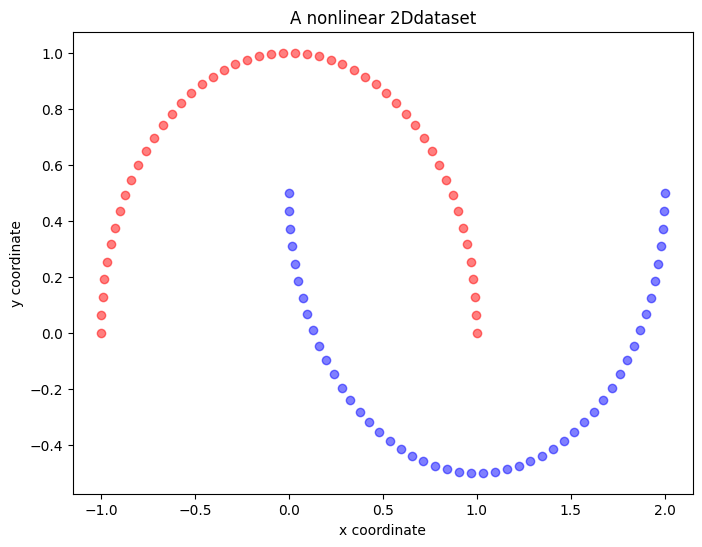

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

<br>
<br>

### Linear PCA

[[back to top](#Sections)]

Dado que las dos formas de media luna son linealmente inseparables, esperamos que el PCA "clásico" no nos dé una "buena" representación de los datos en el espacio 1D. En este caso, utilizaremos la clase PCA que se implementa en scikit-learn para realizar la reducción de la dimensionalidad.
En esta sección, aplicaremos el PCA de kernel RBF a diferentes datos de muestras no lineales


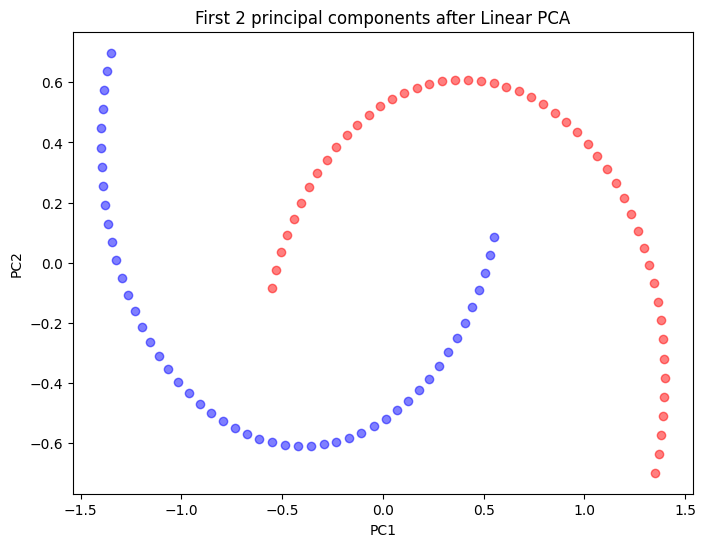

In [ ]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

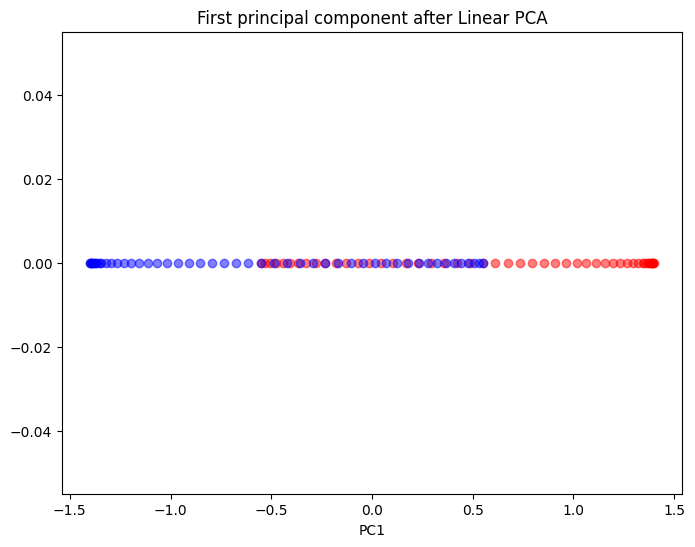

In [ ]:
import numpy as np
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()

Como podemos ver, los componentes principales resultantes no producen un subespacio en el que los datos estén bien separados linealmente. Tenga en cuenta que el PCA es un método no supervisado y no "considera" las etiquetas de clase para maximizar la varianza, en contraste con el [Análisis Discriminante Lineal] que hemos visto en otro notebook. En este caso, los colores azul y rojo sólo se añaden con fines de visualización para indicar el grado de separación.

<br>
<br>

### Gaussian RBF kernel PCA

[[back to top](#Sections)]

A continuación, realizaremos una reducción de la dimensionalidad mediante el kernel PCA de RBF en nuestros datos de la media luna. La elección de 𝛾 depende del conjunto de datos y puede obtenerse a través de técnicas de ajuste de hiperparámetros como grid search. El ajuste de hiperparámetros es un tema amplio en sí mismo, y aquí sólo utilizaré un valor de 𝛾 que he encontrado para producir "buenos" resultados.

<ipython-input-1-b6537c71cfbe>:25: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)
<ipython-input-1-b6537c71cfbe>:37: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))


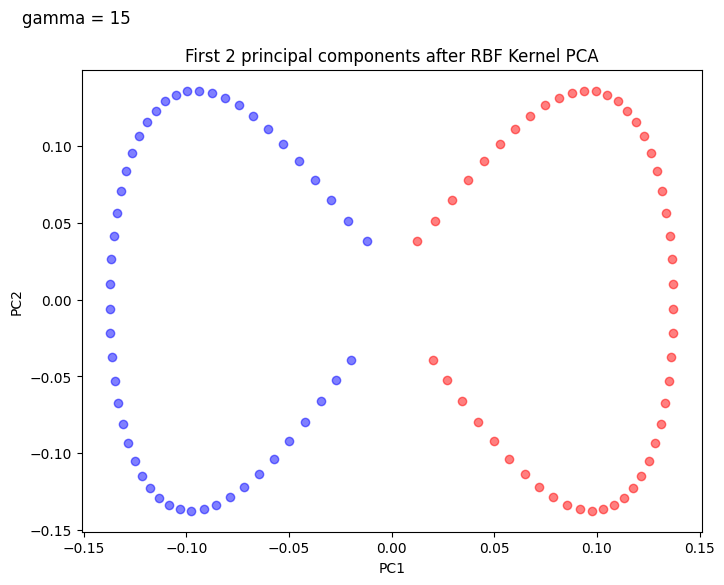

In [ ]:
X_pc = stepwise_kpca(X, gamma=15, n_components=2)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.18, 0.18, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

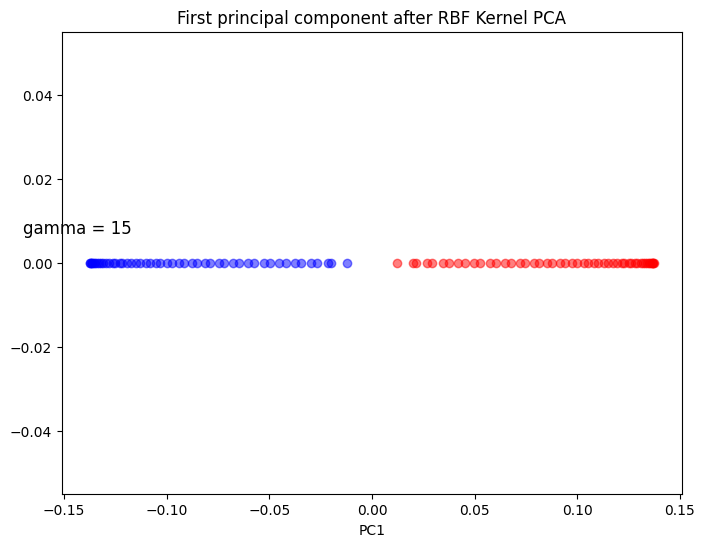

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((50)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((50)), color='blue', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.text(-0.17, 0.007, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.show()

Podemos ver claramente que la proyección a través del kernel PCA de RBF produjo un subespacio en el que las clases están bien separadas. Este subespacio puede utilizarse como entrada para los modelos de clasificación lineal, como SVMs o Naive Bayes

<br>
<br>

### scikit RBF kernel PCA

[[back to top](#Sections)]

Para nuestra comodidad, ya existe una implementación del KernelPCA en scikit-learn. Confirmemos que los resultados de nuestra implementación son consistentes con el enfoque de scikit-learn.

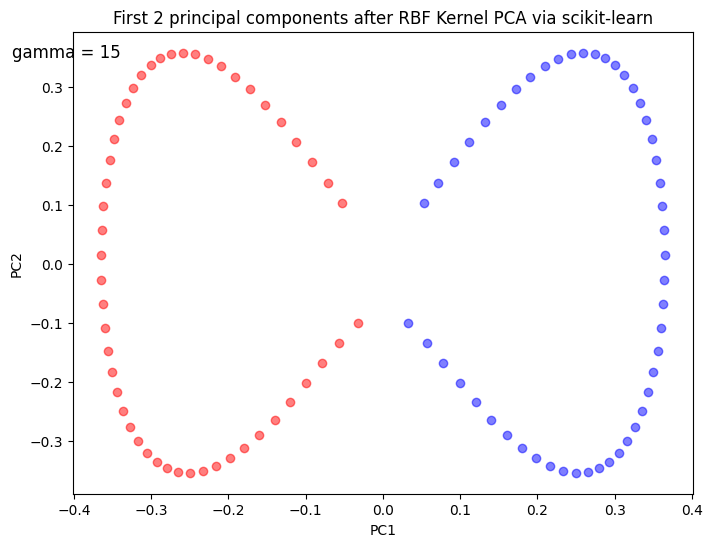

In [ ]:
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', alpha=0.5)

plt.text(-0.48, 0.35, 'gamma = 15', fontsize=12)
plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

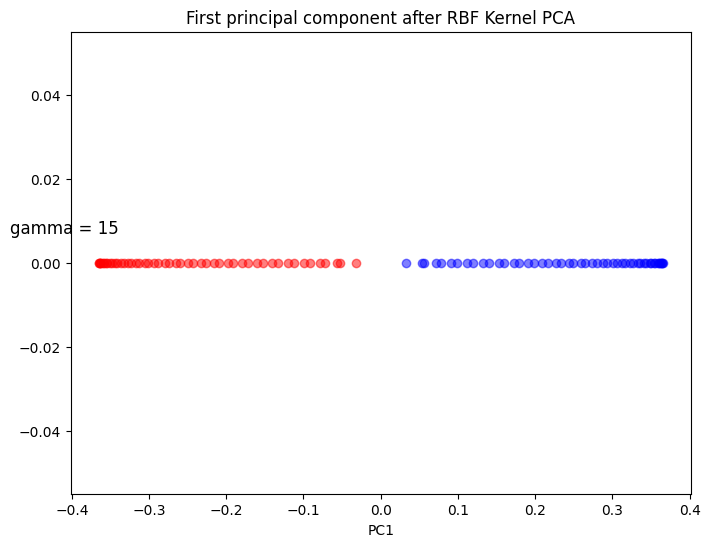

In [ ]:
scikit_kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.text(-0.48, 0.007, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

<br>
<br>

## Círculos concéntricos

[[back to top](#Sections)]

Para nuestro siguiente ejemplo, veremos el caso clásico de 2 círculos concéntricos con ruido aleatorio producido por [`make_circles`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html).



Text(0.5, 0, 'x coordinate')

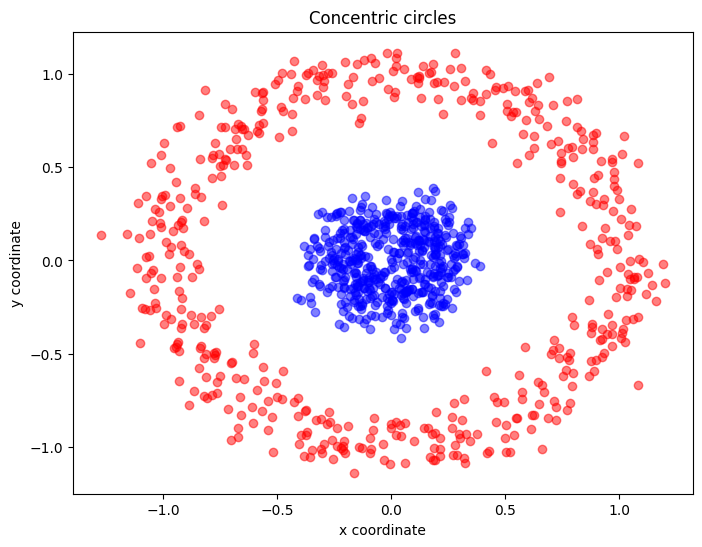

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')


<br>
<br>

### Linear PCA

[[back to top](#Sections)]

Text(0.5, 0, 'PC1')

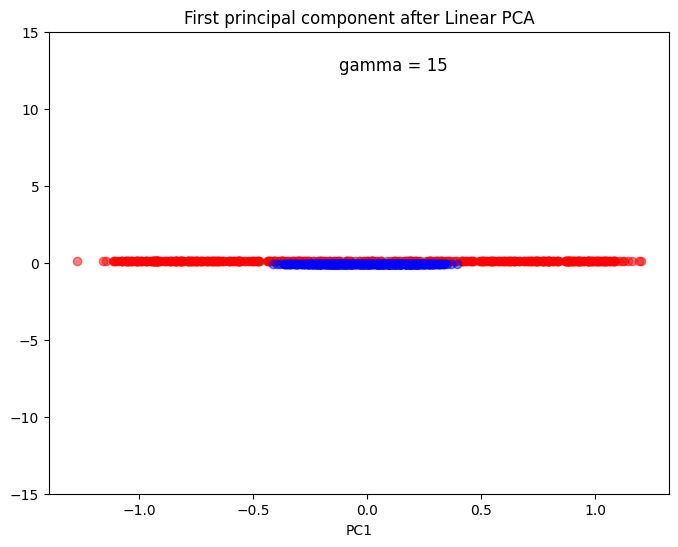

In [ ]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], np.zeros((500,1))+0.1, color='red', alpha=0.5)
plt.scatter(X[y==1, 0], np.zeros((500,1))-0.1, color='blue', alpha=0.5)
plt.ylim([-15,15])
plt.text(-0.125, 12.5, 'gamma = 15', fontsize=12)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')


De nuevo, los resultados obtenidos mediante el enfoque PCA lineal no producen un subespacio en el que las 2 clases estén linealmente bien separadas.
Para nuestro siguiente ejemplo, veremos el caso clásico de 2 círculos concéntricos con ruido aleatorio producido por


<br>
<br>

### Gaussian RBF kernel PCA

[[back to top](#Sections)]

<ipython-input-1-b6537c71cfbe>:25: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)
<ipython-input-1-b6537c71cfbe>:37: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))


Text(0.5, 0, 'PC1')

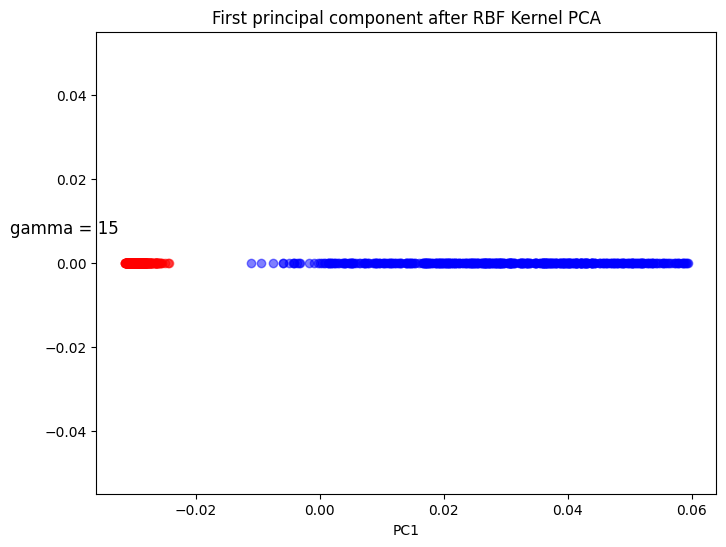

In [ ]:
X_pc = stepwise_kpca(X, gamma=15, n_components=1)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.text(-0.05, 0.007, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')



Y de nuevo, este subespacio unidimensional obtenido mediante el kernel PCA gaussiano RBF parece mucho mejor en términos de separación lineal de clases.
Para nuestro siguiente ejemplo, veremos el caso clásico de 2 círculos concéntricos con ruido aleatorio producido por


<br>
<br>

## Swiss roll

[[back to top](#Sections)]

Desenrollar el famoso rollo suizo es una tarea más difícil que los ejemplos que hemos visto anteriormente. Utilizaremos la función [`make_swiss_roll`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html) para crear un rollo suizo tridimensional y empezaremos con el PCA lineal para proyectar el conjunto de datos en un subespacio de características 2D y 1D.
Para nuestro siguiente ejemplo, veremos el caso clásico de 2 círculos concéntricos con ruido aleatorio producido por


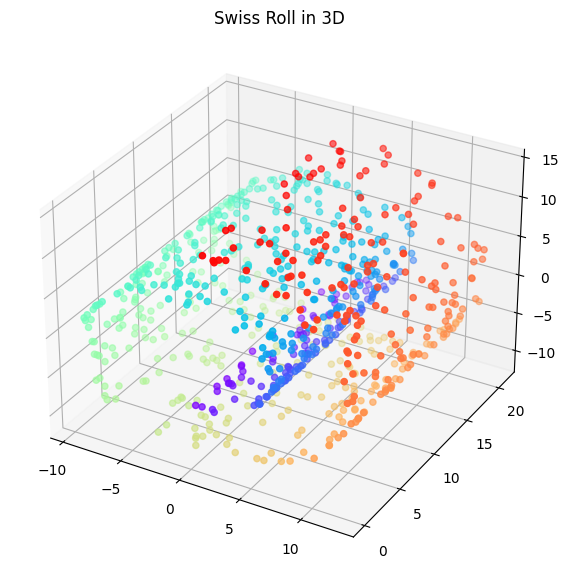

In [ ]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()

<br>
<br>

### Linear PCA

[[back to top](#Sections)]

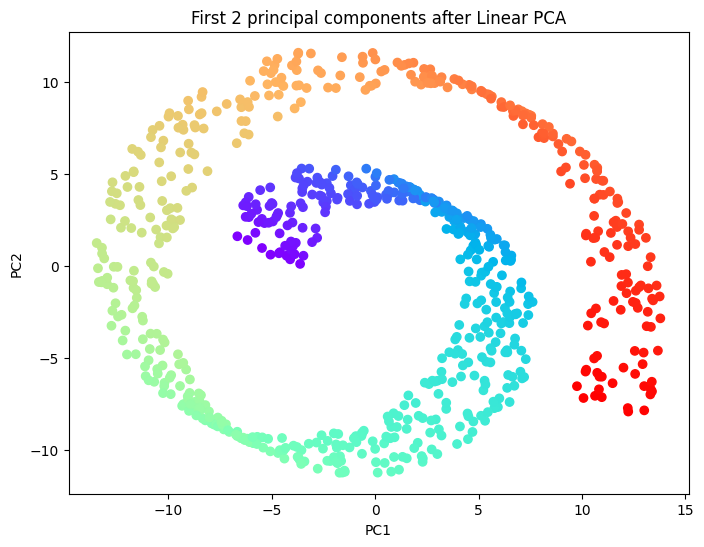

In [ ]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

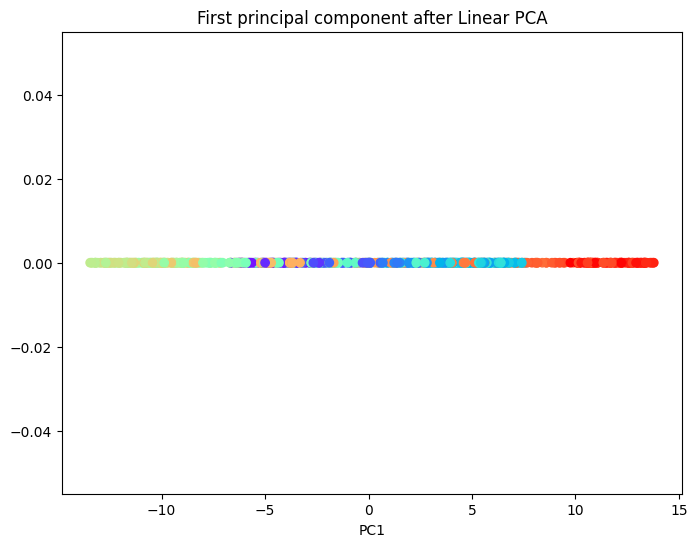

In [ ]:
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca, np.zeros((800,1)), c=color, cmap=plt.cm.rainbow)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

<br>
<br>

### Gaussian RBF kernel PCA

[[back to top](#Sections)]

No he encontrado un buen parámetro $\gamma$ para el kernel RBF gaussiano para una buena separación lineal de este conjunto de datos. El mejor resultado que obtuve se muestra en las siguientes figuras.
Para nuestro siguiente ejemplo, veremos el caso clásico de 2 círculos concéntricos con ruido aleatorio producido por


<ipython-input-1-b6537c71cfbe>:25: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)
<ipython-input-1-b6537c71cfbe>:37: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))


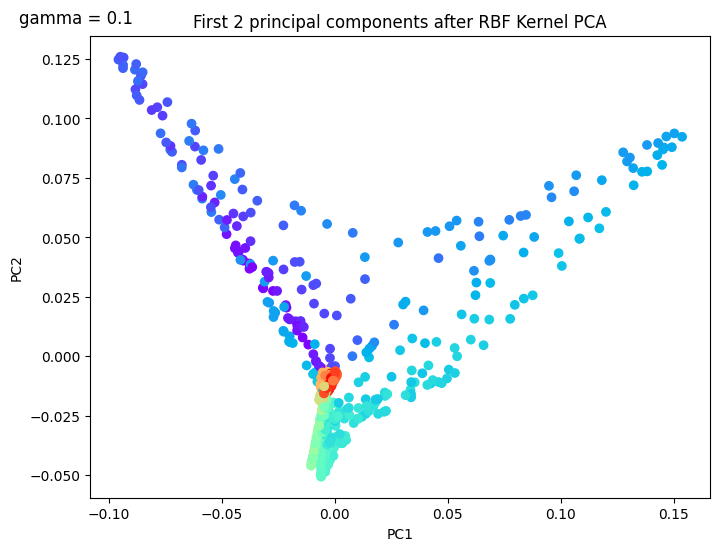

In [ ]:
X_pc = stepwise_kpca(X, gamma=0.1, n_components=2)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[:, 0], X_pc[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.14, 0.14, 'gamma = 0.1', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

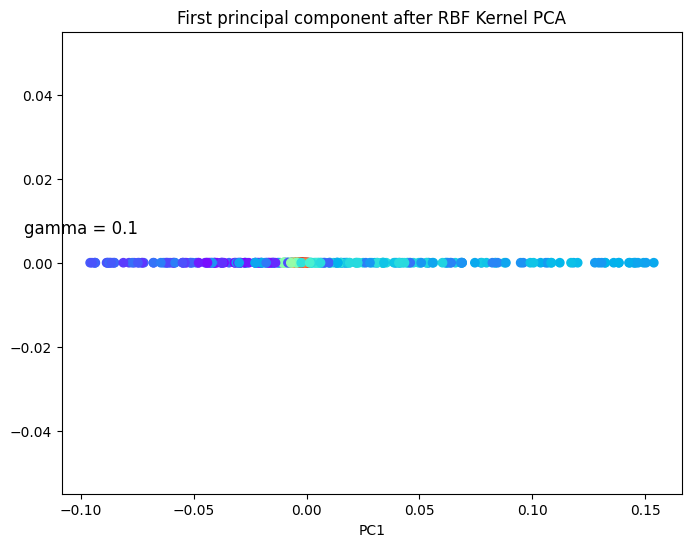

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pc[:,0], np.zeros((800,1)), c=color, cmap=plt.cm.rainbow)

plt.text(-0.125, 0.007, 'gamma = 0.1', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

<br>
<br>

### Locally-Linear Embedding (LLE)

[[back to top](#Sections)]

En el año 2000, Sam T. Roweis y Lawrence K. Saul ([Nonlinear dimensionality reduction by locally linear embedding](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.111.3313) [[4](#References)]) introdujeron un algoritmo de aprendizaje no supervisado llamado locally linear embedding (LLE)

Locally Linear Embedding es una técnica de reducción de la dimensionalidad basada en Manifold Learning. Un Manifold es un objeto de D dimensiones que está incrustado en un espacio de mayor dimensión. Manifold Learning tiene como objetivo hacer que este objeto sea representable en sus D dimensiones originales en lugar de ser representado en un espacio mayor innecesario.

Locally linear embedding (LLE)  busca una proyección de los datos en una dimensión inferior que preserve las distancias dentro de los vecindarios locales. Puede considerarse como una serie de análisis de PCAs locales que se comparan globalmente para encontrar la mejor incrustación no lineal.

Además Locally-Linear Embedding existen otros algoritmos de Manifold Learning como son Isomap, Modified Locally Linear Embedding, Hessian Eigenmapping, etc…
Este tipo de técnicas es más adecuado para identificar patrones en el espacio de características de alta dimensión y resuelve nuestro problema de reducción de dimensionalidad no lineal para el rollo suizo.   


Aquí utilizaremos la clase [`locally_linear_embedding`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html) de scikit-learn para "desenrollar" el rollo suizo.

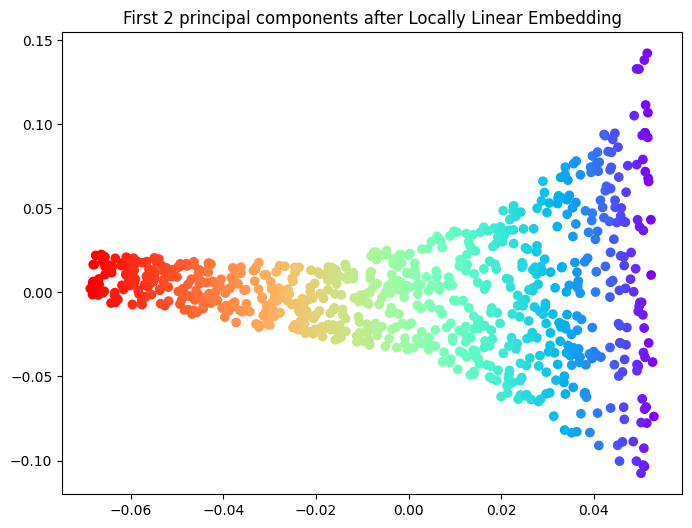

In [ ]:
from sklearn.manifold import locally_linear_embedding

X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)

plt.figure(figsize=(8,6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after Locally Linear Embedding')
plt.show()

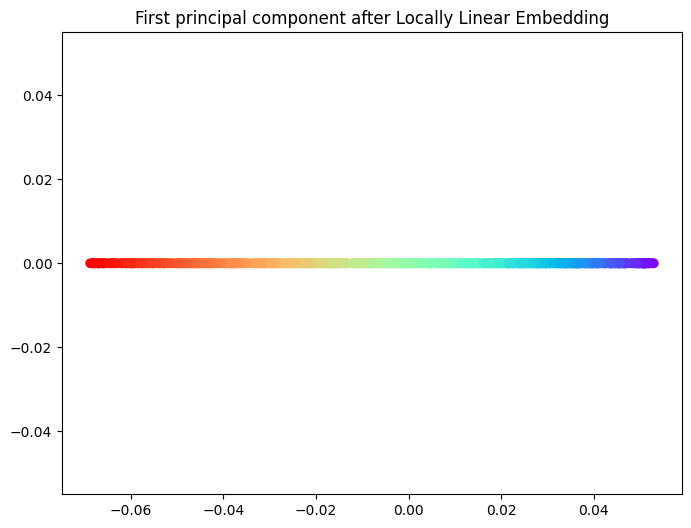

In [ ]:
from sklearn.manifold import locally_linear_embedding

X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=1)

plt.figure(figsize=(8,6))
plt.scatter(X_lle, np.zeros((800,1)), c=color, cmap=plt.cm.rainbow)

plt.title('First principal component after Locally Linear Embedding')
plt.show()

<br>
<br>

<br>
<br>

# Referencias


[[back to top](#Sections)]

[1] Q. Wang. [Kernel principal component analysis and its applications in face recognition and active shape models](http://arxiv.org/abs/1207.3538). CoRR, abs/1207.3538, 2012.

[2] B. Scholkopf, A. Smola, and K.-R. Muller. [Kernel principal component analysis](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.128.7613). pages 583–588, 1997.

[3] B. Scholkopf, A. Smola, and K.-R. Muller. [Nonlinear component analysis as a kernel eigenvalue problem](http://www.mitpressjournals.org/doi/abs/10.1162/089976698300017467#.VBh9QkuCFHg). Neural computation, 10(5):1299–1319, 1998.

[4] S. T. Roweis and L. K. Saul. [Nonlinear dimensionality reduction by locally linear embedding](http://www.sciencemag.org/content/290/5500/2323.short). Science, 290(5500):2323–2326, 2000.
